```pAcondB```: each column ```j``` contains the probabilities of ```A``` given ```B=b[j]```

```pAB[i,j]```: probability that ```A=a[i]``` and ```B=b[j]```

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import webcolors

In [2]:
supY = np.array([0.2, 0.5, 0.8])     # values of y
cardY = len(supY)               # cardinality of Y
pY = np.array([0.3, 0.4, 0.3])       # marginal probability of y

n = 10                          # number of trials   
supX = np.arange(n+1)           # values of x 
cardX = len(supX)               # cardinality of X

pXcondY = np.zeros( (cardX, cardY) )    # each column i will contain the probability of X given Y=supY[i]

for i in range(len(supY)):
    pXcondY[:,i] = sp.stats.binom.pmf(supX, n, supY[i])  # binomial distribution of parameters n and p=supY[i]

pXY = pXcondY * pY.reshape(1,-1)  # joint probability of X and Y
pX = np.sum(pXY, axis=1)          # marginal probability of X

pYcondX = pXY.T / pX.reshape(1,-1)      # each column i will contain the probability of Y given X=supX[i]

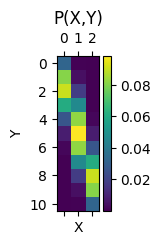

In [3]:
plt.figure( figsize=(1,2) )

cb = plt.matshow( pXY, fignum=1 )
plt.colorbar(cb)

plt.title('P(X,Y)')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [4]:
# Print all shapes
print('pY.shape =', pY.shape)
print('pXcondY.shape =', pXcondY.shape)
print('pXY.shape =', pXY.shape)
print('pX.shape =', pX.shape)
print('pYcondX.shape =', pYcondX.shape)

pY.shape = (3,)
pXcondY.shape = (11, 3)
pXY.shape = (11, 3)
pX.shape = (11,)
pYcondX.shape = (3, 11)


In [5]:
# Check that the probabilities sum to 1
print('sum(pY) =', np.sum(pY))
print('sum(pXcondY) =', np.sum(pXcondY, axis=0))
print('sum(pXY) =', np.sum(pXY))
print('sum(pX) =', np.sum(pX))
print('sum(pYcondX) =', np.sum(pYcondX, axis=0))

sum(pY) = 1.0
sum(pXcondY) = [1. 1. 1.]
sum(pXY) = 1.0000000000000004
sum(pX) = 1.0000000000000004
sum(pYcondX) = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


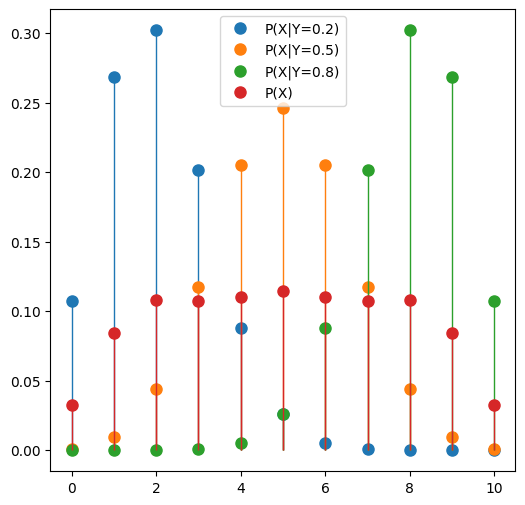

In [6]:
# Plot the probability of X given Y and the marginal probability of X

plt.figure( figsize=(6,6))
plt.clf()               # clear the current figure
plt.subplot(111)        # (nrows, ncols, index)
ax = plt.gca()          # get current axis

for i in range(len(supY)):
        color = next(ax._get_lines.prop_cycler)['color']
        ax.vlines(range(n+1), 0, pXcondY[:,i], linestyles='-', color=color, lw=1)
        ax.plot(range(n+1), pXcondY[:,i], 'o', color=color, ms=8, label='P(X|Y={})'.format(supY[i]))

color = next(ax._get_lines.prop_cycler)['color']
ax.vlines(range(n+1), 0, pX, linestyles='-', color=color, lw=1)
ax.plot(range(n+1), pX, 'o', color=color, ms=8, label='P(X)'.format(supY[i]))

# show legend inside bounded white box
ax.legend(loc='best', frameon=True)
plt.show()

In [7]:
cardT = cardX

qTcondX = np.ones( (cardT,cardX) )                              
qTcondX = qTcondX / np.sum(qTcondX, axis=0).reshape(1,-1)       # each column i will contain the probability of T given X=supX[i]

print('sum(qTcondX) =', np.sum(qTcondX, axis=0))    # check that the conditional probabilities sum to 1

sum(qTcondX) = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
np.array([[1],[2]]) * np.array( [[3,4]] )

array([[3, 4],
       [6, 8]])

In [9]:
def MI(qTcondX, pXY, plot=True):

    cardX = pXY.shape[0]
    cardT = qTcondX.shape[0]

    pX = np.sum(pXY, axis=1)
    ############################
    if plot:
        plt.figure( figsize=(4,2))
        plt.clf()               # clear the current figure
        plt.subplot(111)        # (nrows, ncols, index)
        ax = plt.gca()          # get current axis

        ax.set_title(r'$p(X)$')
        ax.vlines(range(cardX), 0, pX, linestyles='-', color=color, lw=1)
        ax.plot(range(cardX), pX, 'o', color=color, ms=8)

        plt.show()
    ############################

    qTX = qTcondX * pX.reshape(1,-1)
    ############################
    if plot:
        plt.figure( figsize=(4,4))

        cb = plt.matshow( qTX, fignum=1 )
        plt.colorbar(cb)

        plt.title(r'$Q(X,T)$')
        plt.xlabel('T')
        plt.ylabel('X')

        plt.show()
    ############################
        
    qT = np.sum(qTX, axis=1)
    ############################
    if plot:
        plt.figure( figsize=(4,2))
        plt.clf()               # clear the current figure
        plt.subplot(111)        # (nrows, ncols, index)
        ax = plt.gca()          # get current axis

        ax.set_title(r'$q(T)$')
        ax.vlines(range(cardT), 0, qT, linestyles='-', color=color, lw=1)
        ax.plot(range(cardT), qT, 'o', color=color, ms=8)

        plt.show()
    ############################
    
    
    qTX_temp = np.where(qTX==0, 1, qTX) # convention 0 log 0/q = 0
    miTX = np.sum( qTX * np.log( qTX_temp / (qT.reshape(-1,1)*pX.reshape(1,-1)) ) )

    pY = np.sum(pXY, axis=0)
    ############################
    if plot:
        plt.figure( figsize=(4,2))

        cb = plt.matshow( pY.reshape(1,-1), fignum=1 )
        plt.colorbar(cb)

        plt.title(r'$p(Y)$')
        plt.xlabel('Y')

        plt.show()
    ############################
        
    pXcondY = pXY / pY.reshape(1,-1)
    ############################
    if plot:
        plt.figure( figsize=(2,4))

        cb = plt.matshow( pXcondY, fignum=1 )
        plt.colorbar(cb)

        plt.title(r'$p(X|Y)$')
        plt.xlabel('Y')
        plt.ylabel('X')

        plt.show()
    ############################
        
    qTY = qTcondX @ pXcondY
    ############################
    if plot:
        plt.figure( figsize=(4,4))

        cb = plt.matshow( qTY, fignum=1 )
        plt.colorbar(cb)

        plt.title(r'$q(T,Y)$')
        plt.xlabel('Y')
        plt.ylabel('T')

        plt.show()
    ############################

    miTY = np.sum( qTY * np.log( qTY / (qT.reshape(-1,1)*pY.reshape(1,-1)) ) )

    return miTX, miTY

In [10]:
def KL( p, q ):
    return np.sum( p.ravel() * np.log( p.ravel() / q.ravel() ) )

In [11]:
def _qT_( qTcondX, pX ):
    qT = np.sum( qTcondX * pX.reshape(1,-1), axis=1 )
    return qT

In [12]:
def _qYcondT_( pYcondX, qTcondX, pX, qT, plot=False ):
    
    qXT = ( qTcondX * pX.reshape(1,-1) ).T     
    ############################
    if plot:
        plt.figure( figsize=(4,4))

        cb = plt.matshow( qXT, fignum=1 )
        plt.colorbar(cb)

        plt.title(r'$Q(X,T)$')
        plt.xlabel('T')
        plt.ylabel('X')

        plt.show()
    ############################
         
    qXcondT = qXT / qT.reshape(1,-1)                    # each column i will contain the probability of X given T=i
    ############################
    if plot:
        plt.figure( figsize=(4,4))

        cb = plt.matshow( qXcondT, fignum=1 )
        plt.colorbar(cb)

        plt.title(r'$Q(X|T)$')
        plt.xlabel('T')
        plt.ylabel('X')

        plt.show()
    ############################

    ############################
    if plot:
        plt.figure( figsize=(4,2))

        cb = plt.matshow( pYcondX, fignum=1 )
        plt.colorbar(cb, orientation='horizontal')

        plt.title(r'$P(Y|X)$')
        plt.xlabel('X')
        plt.ylabel('Y')

        plt.show()
    ############################

    qYcondT = pYcondX @ qXcondT                         # each column i will contain the probability of Y given T=i
    return qYcondT

In [29]:
import warnings
warnings.simplefilter('error')

In [30]:
def _qTcondX_( pYcondX, qYcondT, qT, cardX, cardT, beta ):

    qTcondX = np.zeros( (cardT, cardX) )
    
    for x in range(cardX):
        for t in range(cardT):
            qTcondX[t,x] = qT[t] * np.exp( -beta * KL( pYcondX[:,x], qYcondT[:,t] ) )
    
    try:
        qTcondX = qTcondX / np.sum( qTcondX, axis=0 ).reshape(1,-1)       # each column i will contain the probability of T given X=supX[i]
    except:
        print(qTcondX)
        print( np.sum( qTcondX, axis=0 ).reshape(1,-1) )

    return qTcondX

In [31]:
# Test functions
qT = _qT_( qTcondX, pX )
print('sum(qT) =', np.sum(qT))

qYcondT = _qYcondT_( pYcondX, qTcondX, pX, qT )
print('sum(qYcondT) =', np.sum(qYcondT, axis=0))

beta = 1
qTcondX = _qTcondX_( pYcondX, qYcondT, qT, cardX, cardT, beta )
print('sum(qTcondX) =', np.sum(qTcondX, axis=0))

sum(qT) = 6.942766640305489e-186
sum(qYcondT) = [1.]
sum(qTcondX) = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [32]:
def iterative_algorithm( supX, cardX, supY, cardY, pXY, cardT, beta, maxiter=10, interval=1, plot=False, printMI=False, init='random' ):

    assert init in ['random', 'uniform', 'dirac', 'diagonal']

    pY = np.sum(pXY, axis=0).ravel()                                # marginal probability of Y
    ############################
    if plot:
        plt.figure( figsize=(4,2))

        cb = plt.matshow( pY.reshape(1,-1), fignum=1 )
        plt.colorbar(cb)

        plt.title(r'$p(Y)$')
        plt.xlabel('Y')

        plt.show()
    ############################

    pX = np.sum(pXY, axis=1).ravel()                                # marginal probability of X
    ############################
    if plot:
        plt.figure( figsize=(4,2))
        plt.clf()               # clear the current figure
        plt.subplot(111)        # (nrows, ncols, index)
        ax = plt.gca()          # get current axis

        ax.set_title(r'$p(X)$')
        ax.vlines(range(cardX), 0, pX, linestyles='-', color=color, lw=1)
        ax.plot(range(cardX), pX, 'o', color=color, ms=8)

        plt.show()
    ############################

    pXcondY = pXY / pY.reshape(1,-1)                                # each column j will contain the probability of X given Y=supY[j]
    pYcondX = pXY.T / pX.reshape(1,-1)                              # each column j will contain the probability of Y given X=supX[j]
    ############################
    if plot:
        plt.figure( figsize=(4,2) )

        ax = plt.subplot(121)
        cb = ax.matshow( pYcondX )
        plt.colorbar(cb, ax=ax)

        ax.set_title(r'$P(Y|X)$')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

        ax = plt.subplot(122)

        cb = ax.matshow( pXcondY )
        plt.colorbar(cb, ax=ax)

        ax.set_title(r'$P(X|Y)$')
        ax.set_xlabel('Y')
        ax.set_ylabel('X')

        plt.show()
    ############################

    if init == 'random':
        qTcondX = np.random.randint(1, 10, size=(cardT, cardX)).astype(float)

    elif init == 'uniform':
        qTcondX = np.ones( (cardT, cardX) )
    
    elif init == 'dirac':
        qTcondX = np.ones( (cardT, cardX) )*(1e-3)
        qTcondX[0,:] = 1.

    elif init == 'diagonal':
        qTcondX = np.ones( (cardT, cardX) )*(1e-3)
        np.fill_diagonal(qTcondX, 1.)
        
    qTcondX = qTcondX / np.sum(qTcondX, axis=0).reshape(1,-1)       # each column j will contain the probability of T given X=supX[j]

    
    ############################
    if plot:
        plt.figure( figsize=(4,4))

        cb = plt.matshow( qTcondX, fignum=1 )
        plt.colorbar(cb)

        plt.title(r'$Q^{0}(T|X)$')
        plt.xlabel('X')
        plt.ylabel('T')

        plt.show()
    ############################

    qT = _qT_( qTcondX, pX )                                        # marginal probability of T
    ############################
    if plot:
        plt.figure( figsize=(4,2))
        plt.clf()               # clear the current figure
        plt.subplot(111)        # (nrows, ncols, index)
        ax = plt.gca()          # get current axis

        ax.set_title(r'$Q^{0}(T)$')
        ax.vlines(range(cardT), 0, qT, linestyles='-', color=color, lw=1)
        ax.plot(range(cardT), qT, 'o', color=color, ms=8)

        plt.show()
    ############################
            
    qYcondT = _qYcondT_( pYcondX, qTcondX, pX, qT, plot=plot )      # each column j will contain the probability of Y given T=supT[j]
    ############################
    if plot:
        plt.figure( figsize=(4,2))

        cb = plt.matshow( qYcondT, fignum=1 )
        plt.colorbar(cb, orientation='horizontal')

        plt.title(r'$Q^{0}(Y|T)$')
        plt.xlabel('T')
        plt.ylabel('Y')

        plt.show()  
    ############################

    miTX_iter = []
    miTY_iter = []

    for i in range(maxiter):
        qTcondX = _qTcondX_( pYcondX, qYcondT, qT, cardX, cardT, beta )
        ############################
        if plot and i%interval == 0:
            plt.figure( figsize=(4,4) )

            cb = plt.matshow( qTcondX, fignum=1 )
            plt.colorbar(cb)

            plt.title(r'$Q^{{{}}}(T|X)$'.format(i+1))
            plt.xlabel('X')
            plt.ylabel('T')

            plt.show()
        ############################
            
        qT = _qT_( qTcondX, pX )
        ############################
        if plot and i%interval == 0:
            plt.figure( figsize=(4,2))
            plt.clf()               # clear the current figure
            plt.subplot(111)        # (nrows, ncols, index)
            ax = plt.gca()          # get current axis

            ax.set_title(r'$Q^{{{}}}(T)$'.format(i+1))
            ax.vlines(range(cardT), 0, qT, linestyles='-', color=color, lw=1)
            ax.plot(range(cardT), qT, 'o', color=color, ms=8)

            plt.show()
        ############################

        qYcondT = _qYcondT_( pYcondX, qTcondX, pX, qT, plot=plot and i%interval )
        ############################
        if plot and i%interval == 0:
            plt.figure( figsize=(4,2))

            cb = plt.matshow( qYcondT, fignum=1 )
            plt.colorbar(cb, orientation='horizontal')

            plt.title(r'$Q^{{{}}}(Y|T)$'.format(i+1))
            plt.xlabel('T')
            plt.ylabel('Y')

            plt.show()
        ############################

        miTX, miTY = MI(qTcondX, pXY, plot=plot)
        miTX_iter.append( miTX )
        miTY_iter.append( miTY )

        if printMI:
            print('Iteration {}/{} - MI(T;X) = {:.4e} - MI(T;Y) = {:.4e}'.format(i+1, maxiter, miTX, miTY), end='\r')


    ############################
    if plot:
        plt.figure( figsize=(4,4))

        cb = plt.matshow( qTcondX, fignum=1 )
        plt.colorbar(cb)

        plt.xlabel('X')
        plt.ylabel('T')

        plt.show()
    ############################

    return qTcondX, miTX_iter, miTY_iter

In [33]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

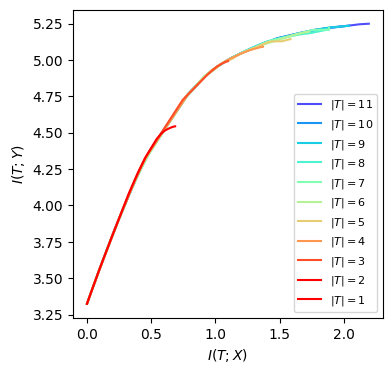

In [43]:
miTX_list = []
miTY_list = []

init = 'random'
plot = False
printMI = False

plt.figure( figsize=(4,4))

cardT_list =  np.arange(1,cardX+1)
colors = plt.cm.rainbow( cardT_list/(len(cardT_list)-1) )

for i, cardT in enumerate( cardT_list[-1::-1] ):

    miTX_list = []
    miTY_list = []

    for beta in np.concatenate( ( np.linspace(1e-2, 1, 10), np.linspace(1e-2, 1, 10), np.linspace(1, 2, 10), np.linspace(2, 10, 10), np.linspace(11, 100, 10), np.linspace(100, 200, 10) ) ):
        
        if printMI:
            print('Beta =', beta)
        qTcondX, miTX_iter, miTY_iter = iterative_algorithm( supX, cardX, supY, cardY, pXY, cardT, beta, maxiter=10, interval=1, plot=False, printMI=False, init='random')
        miTX_list.append( miTX_iter[-1] )
        miTY_list.append( miTY_iter[-1] )
        if printMI:
            print(end='\n\n')
    # print('Shape of qTcondX =', qTcondX.shape) 
    
    # smooth out the curves
    for j in range(1, len(miTX_list)):  
        if miTY_list[j] < miTY_list[j-1] or miTX_list[j] < miTX_list[j-1]:
            miTY_list[j] = miTY_list[j-1]
            miTX_list[j] = miTX_list[j-1]
    
    p = plt.plot(miTX_list, miTY_list, '-', color=colors[i], label=r'$|T|={{{}}}$'.format(cardT))
    # p = plt.plot(miTX_list, miTY_list, 'o', color=colors[i], label='T={}'.format(cardT))

    # color_hex = p[0].get_color()
    # color_rgb = webcolors.hex_to_rgb(color_hex)
    # actual_name, closest_name = get_colour_name(color_rgb)
    # print('cardT =', cardT, ' - color =', closest_name)

plt.legend( fontsize=8 )    
plt.xlabel(r'$I(T;X)$')
plt.ylabel(r'$I(T;Y)$')
plt.savefig("./relevance-compression-curves.png", dpi=300, bbox_inches="tight")
plt.show()